In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import spacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('en')
from nltk.corpus import stopwords
stopWords = list(set(stopwords.words('english')))
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def process_text(text, type_='real'):

  # remove unnecessary characters
  s = re.sub(r"\\n", " ", str(text))
  s = re.sub(r":", "", s)
  s = re.sub(r"[^A-Za-z0-9^!./'+-=]", " ", s)  
  
  # tokenize lower cased string 
  s = s.lower().split()  
  
  # stop words
  stop_words = list(stopwords.words('english'))
  
  if type_ == 'fake':
    stop_words.append('say')
    stop_words.append('says')
    stop_words.append('said')
    stop_words.append('video')
    stop_words.append('watch')
    stop_words.append('ilhan')
    stop_words.append('omar')
    stop_words.append('ocasio')
    stop_words.append('cortez')
    stop_words.append('breaking')
    
  else:    
    stop_words.append('politics')
    stop_words.append('lisa')
    stop_words.append('lerer')
    stop_words.append('newsletter')
    stop_words.append('week')
    
  # Remove stop_words including 'says'  
  s = [w for w in s if not w in stop_words] # and w.isalpha()]
  
  s = " ".join(s).rstrip()  
  
  # Remove repeating sentences
#   s.replace("biggest stories week", " ")
#   if s == "biggest stories week":
#     s = ""
#   if s == "It's been a busy week in American politics. Here are some of the stories you might have missed."

  return s

In [0]:
#truncate upto first 315 rows to consider data from 2018-2019
fake_statements_1 = pd.read_csv('politifact_fake_statements.csv')[['statement','label']][:315]

fake_statements_2 = pd.read_csv('fake_news_only_statement.csv')[['statement','label']]

fake_statements = fake_statements_1.append(fake_statements_2)
real_statements = pd.read_csv('real_news_only_statements.csv')[['statement','label']]
real_body = pd.read_csv('real_news_only_body.csv')[['statement','label']]
fake_body = pd.read_csv('fake_news_only_statement.csv')[['statement','label']]


print(fake_statements_1.shape)
print(fake_statements_1.tail())
print(real_statements.shape)
# print(real_body.head())
print(fake_body.shape)

(315, 2)
                                             statement label
310  "Trump: police officers and firefighters make ...  fake
311  Says Sandra Bullock said to Hillary Clinton, "...  fake
312  "Trump vows to end winter heating assistance f...  fake
313  Says Shaquille O’Neal said Donald Trump "is po...  fake
314  "Police discover meth lab in back room of Alab...  fake
(600, 2)
(313, 2)


In [0]:
#preprocessing

fake_statements['statement'] = fake_statements['statement'].apply(lambda x: process_text(x, 'fake'))
fake_body['statement'] = fake_body['statement'].apply(lambda x: process_text(x, 'fake'))

real_statements['statement'] = real_statements['statement'].apply(lambda x: process_text(x))
real_body['statement'] = real_body['statement'].apply(lambda x: process_text(x))

In [0]:
df_statements = fake_statements.sample(frac=real_statements.shape[0]/fake_statements.shape[0]).reset_index(drop=True)\
                .append(real_statements)
 
df_body = real_body.sample(frac=fake_body.shape[0]/real_body.shape[0]).reset_index(drop=True).append(fake_body)  

In [0]:
# transforming labels to 0-1: fake=1 , real=0
df_statements.replace(['fake', 'real'], [1,0], inplace=True)
df_body.replace(['fake', 'real'], [1,0], inplace=True)

print('# of fake statements:',list(df_statements['label']).count(1))
print('# of real statements:',list(df_statements['label']).count(0))
print('# of fake body:',list(df_body['label']).count(1))
print('# of real body:',list(df_body['label']).count(0))

print(df_statements.tail())
print(df_body.tail())
set(df_statements['label'])

# of fake statements: 600
# of real statements: 600
# of fake body: 313
# of real body: 313
                                             statement  label
595       daniel patrick moynihan, anti-trump american      0
596                                          war sexes      0
597                                      reality check      0
598  bonded service, freshman veteran democrats occ...      0
599                 fight men shaping political future      0
                                             statement  label
308  unhinged, angry, actor robert like punch trump...      1
309  starbucks schultz heckled angry leftist mentio...      1
310  ob-gyn threatened exposing truth ny new day bi...      1
311  comedy gold! gillette razor ad meets covington...      1
312  acting attorney general announces latest muell...      1


{0, 1}

In [0]:
print(df_body.shape)
print(df_statements.shape)
df_body.drop_duplicates(inplace=True)
df_statements.drop_duplicates(inplace=True)
print(df_statements.shape)
print(df_body.shape)

df_statements.head()

(626, 2)
(1200, 2)
(873, 2)
(504, 2)


,statement,label
0,"trump-supporting victim violent, leftist thug ...",1
1,democratic senators demand supreme court nomin...,1
2,may know recent 3.4 million lotto winner. like...,1
3,"keanu reeves said, me, trump symbol successful...",1
4,"nfl lawyer, claimed super bowl rigged , found ...",1


In [0]:
def display_word_cloud(corpus):
#   t = list(truncated_df_train['statement'][truncated_df_train['label']==1].values)
#   text = ' '.join(t)
  wordcloud = WordCloud(width = 500, height = 300, background_color = 'black').generate(corpus)
  fig = plt.figure(figsize = (8, 6), facecolor = 'k', edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

### Wordcloud

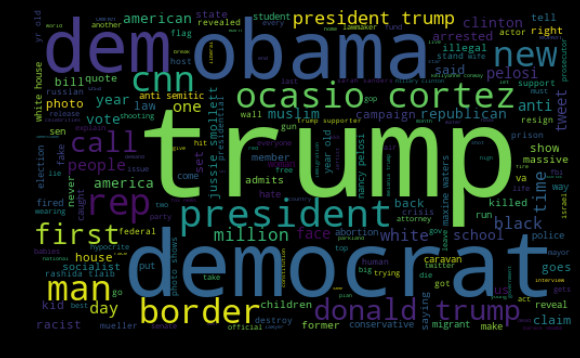

In [0]:
#fake statements 
t = list(df_statements['statement'][df_statements['label']==1].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

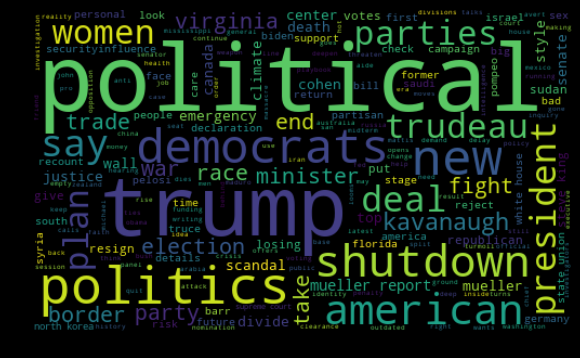

In [0]:
#real statements 
t = list(df_statements['statement'][df_statements['label']==0].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

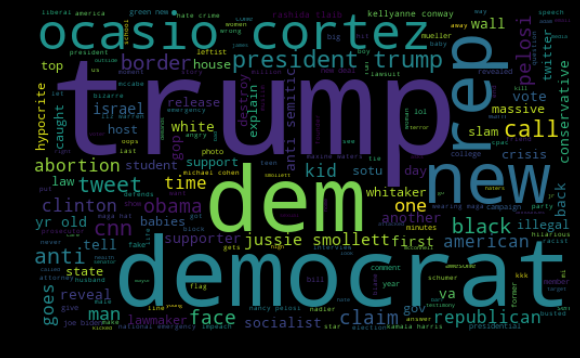

In [0]:
#fake bodies
t = list(df_body['statement'][df_body['label']==1].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

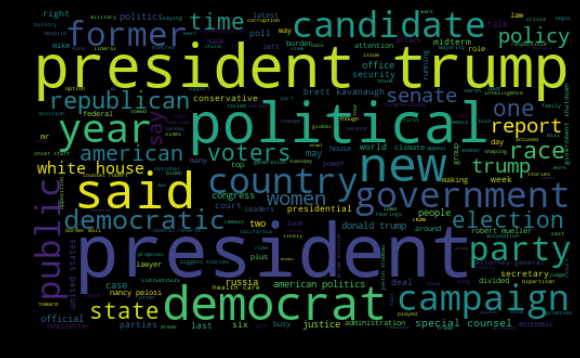

In [0]:
#real bodies
t = list(df_body['statement'][df_body['label']==0].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

### SVM & MultinomialNB

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

In [0]:
def perform_cross_validation(clf, data, labels, folds, metrics):    
    cv = cross_validate(clf, data, labels, scoring=metrics, cv=folds, return_train_score=True)    
    return cv

In [0]:
##### Feature Engineering #####

y = df['label']

# tf-idf matrix

#ngram-words
# tfidf_ = TfidfVectorizer(ngram_range=(1, 3)).fit_transform(df['text']).toarray()  
# tfidf_ = TfidfVectorizer(ngram_range=(1, 3), min_df=3).fit_transform(df['text']).toarray() 
# tfidf_ = TfidfVectorizer(ngram_range=(1, 3), min_df=5).fit_transform(df['text']).toarray()

# tfidf_ = TfidfVectorizer(ngram_range=(1, 3), min_df=7).fit_transform(df['text']).toarray()
# tfidf_ = TfidfVectorizer(ngram_range=(1, 6), min_df=7).fit_transform(df['text']).toarray()

#ngram-charactes
# tfidf_ = TfidfVectorizer(ngram_range=(1, 8), analyzer='char_wb').fit_transform(df['text']).toarray()
# tfidf_ = TfidfVectorizer(ngram_range=(1, 6), analyzer='char_wb').fit_transform(df['text']).toarray()
# tfidf_ = TfidfVectorizer(ngram_range=(1, 8), analyzer='char_wb', strip_accents='ascii',sublinear_tf=True)\
#             .fit_transform(df['text']).toarray()

print(tfidf_.shape)

In [0]:
##### Training model #####

# Using SVM with radial basis function kernel for classification
svm_clf = svm.SVC(kernel='rbf', gamma='auto') 

#5-fold cross validation
cv_svm = perform_cross_validation(svm_clf, tfidf_, y, 5, ['accuracy']) #or average_accuracy

In [0]:
##### Report scores #####
## SVM
# accuracy scores on test set using 5-fold cross validation
print(cv_svm['train_accuracy'])
print(cv_svm['test_accuracy'])
print("Average test accu:", np.mean(cv_svm['test_accuracy']))

In [0]:
mnb = MultinomialNB()

#5-fold cross validation
cv_mnb = perform_cross_validation(mnb, tfidf_, y, 5, ['accuracy']) #or average_accuracy

In [0]:
##### Report scores #####
## MNB
# accuracy scores on test set using 5-fold cross validation
print(cv_mnb['train_accuracy'])
print(cv_mnb['test_accuracy'])
print("Average test accu:", np.mean(cv_mnb['test_accuracy']))

### CNN

In [0]:
!pip install paramiko
from gensim.models import Word2Vec

# keras import
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, GlobalMaxPooling1D
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.preprocessing import sequence, text
from keras.initializers import Constant

In [0]:
statements = df_statements['statement'].apply(lambda x: nltk.word_tokenize(x)).values.tolist()
bodies = df_body['statement'].apply(lambda x: nltk.word_tokenize(x)).values.tolist()
# statements[:2]
# bodies[:10]

print(max(df_body['statement'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))))
# t = df_body['statement'].apply(lambda x:len(x))
# df_body['statement'].head(1)

In [0]:
## New features for CNN:

#1. word counts
df_statements['word_count'] = df_statements['statement'].apply(lambda x: len(nltk.word_tokenize(x))) 
df_body['word_count'] = df_body['statement'].apply(lambda x: len(nltk.word_tokenize(x)))
# print(list(df_statements['word_count']).count(1))
# print(list(df_statements['word_count']).count(2))
# print(list(df_statements['word_count']).count(3))
# print(list(df_statements['word_count']).count(4))

#2. sentences counts
df_statements['sent_count'] = df_statements['statement'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))
df_body['sent_count'] = df_body['statement'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))

#3 

In [0]:
w2v_model = Word2Vec(statements, min_count=1)
print(w2v_model)

# vocabulary
words = list(w2v_model.wv.vocab)

model_vecs = w2v_model[w2v_model.wv.vocab]
print(model_vecs.shape)

Word2Vec(vocab=3480, size=100, alpha=0.025)
(3480, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [0]:
# parameters
VOCAB_SIZE = 1000
EMBEDDING_DIMS = model_vecs.shape[1]
MAX_SEQUENCE_LENGTH = 1000
FILTERS = 128 #number of filters/size of output layer/features maps
KERNEL_SIZE = 5 #filter window size
BATCH_SIZE = 32
HIDDEN_DIMS = 50

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_statements['statement'], df_statements['label'], random_state=0, test_size=0.3)

# X_train, y_train = df_statements['statement'], df_statements['label']

tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

train = tokenizer.texts_to_matrix(X_train)
test = tokenizer.texts_to_matrix(X_test)

print(X_train.head())
print(y_train.head())

train = sequence.pad_sequences(train, maxlen=MAX_SEQUENCE_LENGTH)
test = sequence.pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)

# print(train)
# print(test.shape)

235    fulton county numbers show massive duplicate b...
424    mccarran-walter act 1952 bans muslims holding ...
241    sarah sanders blasts dems hypocrisy ignoring m...
331    twitter caught leaking donald trump private me...
271    boom! covington student big gun lawyer release...
Name: statement, dtype: object
235    1
424    1
241    1
331    1
271    1
Name: label, dtype: int64


In [0]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIMS))
# using trained word2vec on train dataset
# for i in range(VOCAB_SIZE):
#     embedding_vector = w2v_model.wv[w2v_model.wv.index2word[i]]
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

# using pretrained glove
embeddings_index = dict()
f = open('/content/gdrive/My Drive/Stevens/Spring 2019/ML/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# embedding_matrix = np.zeros((config.vocab_size, 100))
for word, index in tokenizer.word_index.items():
    if index > VOCAB_SIZE - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

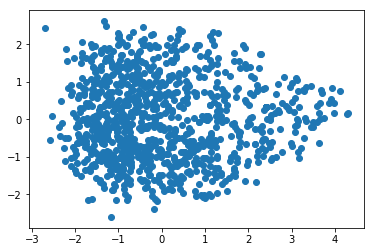

In [0]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2).fit_transform(embedding_matrix)

# plt.figure(figsize=(16, 16))
plt.scatter(pca[:,0], pca[:,1])

# to annotate wach point with word label
# for i, word in enumerate(words):
#   if i%2 == 0:
#     plt.annotate(word, xy=(pca[i, 0], pca[i, 1]))

plt.show()


In [0]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIMS,
                            embeddings_initializer=Constant(embedding_matrix),
#                             weights = [embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Dropout(0.5)(embedded_sequences)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(FILTERS, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)

In [0]:
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 1000, 100)         100000    
_________________________________________________________________
dropout_17 (Dropout)         (None, 1000, 100)         0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 199, 128)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 39, 128)           0         
__________

In [0]:
EPOCHS = 50

history = model.fit(train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/50
611/611 [==============================] - 8s 12ms/step - loss: 0.5851 - acc: 0.6776
Epoch 2/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5619 - acc: 0.7005
Epoch 3/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5646 - acc: 0.7038
Epoch 4/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5744 - acc: 0.6890
Epoch 5/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5496 - acc: 0.7087
Epoch 6/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5407 - acc: 0.7480
Epoch 7/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5300 - acc: 0.7201
Epoch 8/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5100 - acc: 0.7349
Epoch 9/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5098 - acc: 0.7250
Epoch 10/50
611/611 [==============================] - 7s 11ms/step - loss: 0.5162 - acc: 0.7349
Epoch 11/50
611/611 [==================

dict_keys(['loss', 'acc'])


KeyError: ignored

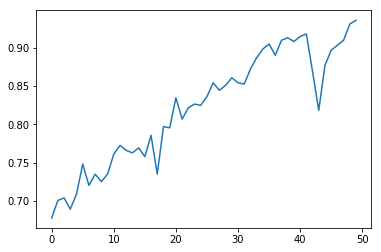

In [0]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# print()
# predictions using pretrained glove
prediction = model.predict(test)

#   print()
# prediction

final_preds = np.where(prediction > 0.5, 1, 0)

for i in range(50):
  print(y_test.iloc[i], prediction[i], final_preds[i])



1 [0.00889617] [0]
0 [0.88447964] [1]
1 [0.45175442] [0]
1 [0.9993677] [1]
1 [0.9999128] [1]
1 [0.02038547] [0]
1 [0.88444066] [1]
0 [0.21319589] [0]
1 [0.9993242] [1]
1 [0.99939656] [1]
1 [0.11118585] [0]
1 [0.1514748] [0]
0 [0.11052334] [0]
1 [0.9999321] [1]
1 [0.10353622] [0]
0 [0.0748744] [0]
1 [0.9998356] [1]
1 [0.00025463] [0]
0 [0.00857937] [0]
1 [0.02182072] [0]
1 [0.99133396] [1]
1 [0.02414319] [0]
1 [0.18428645] [0]
0 [0.01511925] [0]
0 [0.08540261] [0]
0 [0.10639229] [0]
1 [0.99996936] [1]
1 [0.99997807] [1]
0 [0.12185609] [0]
0 [0.6264421] [1]
0 [0.09249571] [0]
1 [0.99611616] [1]
0 [0.99372566] [1]
1 [0.01356784] [0]
1 [0.02683738] [0]
1 [0.9999448] [1]
0 [0.18847153] [0]
1 [0.9602243] [1]
1 [0.9753559] [1]
1 [0.0001072] [0]
1 [0.9941095] [1]
1 [0.44012216] [0]
1 [0.9550913] [1]
1 [0.1525886] [0]
0 [0.05716085] [0]
1 [0.2401641] [0]
1 [0.98085856] [1]
1 [0.9982659] [1]
0 [0.00824189] [0]
0 [0.0089651] [0]


In [0]:
#fake=1, real=0
#np.where(prediction > threshold, 1, 0)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, final_preds))
print(metrics.classification_report(y_test, final_preds, labels=[0,1]))


Accuracy: 0.7137404580152672
              precision    recall  f1-score   support

           0       0.54      0.81      0.64        84
           1       0.88      0.67      0.76       178

   micro avg       0.71      0.71      0.71       262
   macro avg       0.71      0.74      0.70       262
weighted avg       0.77      0.71      0.72       262

